# Practice 6 - Graph Transversal Algorithms I

## Valenzuela Ascencio Gustavo - 117002029 - EDA II - Group: 2 - Semester: 2024-1 - FI UNAM

### What is a graph? 🛣️

A graph is a mathematical entity consisting of a set of nodes connected by edges. In computer science, they are a highly efficient data structure for modeling objects, problems that involve relating things, describing paths, creating and studying networks, and more.

### Breadth First Search 📍

The breadth-first search algorithm has the function of traversing the entire graph, distinguishing between visited and unvisited nodes in the process, in order to find a node, determine connected components, the shortest path, etc.

This algorithm is useful for solving various problems related to graph theory, network problems, and navigation-related problems. Here are some examples:

- Finding the shortest path between two nodes in an unweighted graph (numeric values on its edges).
- In peer-to-peer networks, BFS is used to determine all neighboring nodes.
- In social networks, to determine common friends, BFS is used to determine how many connections we are away from a person.
- In GPS systems, BFS is used to determine nearby locations.
- Detecting a cycle in a directed or undirected graph.
- Finding all nodes in a component of a graph.
- There are many more, but these are some of the most important ones.

#### BFS implementation and analysis using RAM model

In [42]:
class Node:
    to = 0
    cost = 0
    next = None
    prev = None
    color = 0
    distance = -1
    def __init__(self, to, next, c):
        self.to = to
        self.next = next
        self.cost = c

class Graph:
    edges = []
    grade = []
    numNodes = 0
    numEdges = 0
    isDirected = False
    isTagged = False
    
    
    def __init__ (self, nodes, edges, isDirected, isTagged):
        self.numNodes = nodes
        self.numEdges = edges
        self.edges = []
        self.grade = []
        self.isTagged = isTagged
        self.isDirected = isDirected
        for i in range(0,nodes+1):
            self.grade.append(0)
            self.edges.append(None)

    def __str__ (self):
        item = None
        res = ""
        for i in range(1,self.numNodes+1):
            res += "\nNode #" + str(i) + " :\t"
            item = self.edges[i]
            j = 0
            while item != None:
                res += str(item.to) + ":" + str(item.cost) + "\t"
                item = item.next
        res += "\n"
        return res

    
    def addEdge(self, intU, intV, cost, isDirected):
        newNode = Node(intV, self.edges[intU], cost)
        self.edges[intU] = newNode
        self.grade[intU] += 1

        if isDirected == False and intV != intU:
            self.addEdge(intV, intU, cost, True)

    
    def readEdges(self):
        for i in range(1,self.numEdges+1):
            u = int(input('U: '))
            v = int(input('V: '))
            if self.isTagged == True:
                cost = int(input('Weight: '))
            else:
                cost = 1
            self.addEdge(u, v, cost, False)
    
    def readEdgesList(self,listU,listV):
        for i in range(0,len(listU)):
            u = listU[i]
            v = listV[i]
            cost = 1
            self.addEdge(u, v, cost, False)
    
    #                                       BFS ANALYSIS
    #                                AVERAGE || WORST || SPACE
    
    def BFS(self, startNode):
        self.edges[startNode].color = 1      #   6  ||  6    ||  1
        self.edges[startNode].distance = 0   #   6  ||  6    ||  1
        self.edges[startNode].prev = None    #   6  ||  6    ||  1 
        queue = []                           #   3  ||  3    ||  V (Queue of length V)
        queue.append(startNode)              #   3  ||  3    ||  1
        while len(queue) != 0:               #   5(V+1)||  5(V+1)     ||  1
            u = queue.pop(0)                 #   5(V)  ||   5(V)      ||  1
            v = self.edges[u]                #   5(V)  ||   5(V)      ||  1
            while v != None:                 #    5(V+(E+1)) ||  5(V+((V*(V-1)/2)+1))  ||   1
                if self.edges[v.to] != None:                                    #  7(V+E)   ||  7((V^2+V)/2)    ||  1
                    if self.edges[v.to].color == 0:                             #  7(V+E)   ||  7((V^2+V)/2)    ||  1
                        self.edges[v.to].color = 1                              #  6(V+E)   ||  6((V^2+V)/2)    ||  1
                        self.edges[v.to].distance = self.edges[u].distance + 1  #  10(V+E)  ||  10((V^2+V)/2)   ||  1
                        self.edges[v.to].prev = u                               #  6(V+E)   ||  6((V^2+V)/2)    ||  1
                        queue.append(v.to)                                      #  4(V+E)   ||  4((V^2+V)/2)    ||  1
                v = v.next                                                      #  4(V+E)   ||  4((V^2+V)/2)    ||  1 
            self.edges[u].color = 2                                             #  5(V)     ||   5(V)   ||  1
    
    # BFS Best case polynomial: 29 = O(1) (This is for an isolated node or a not connected graph)
    # BFS Average case polynomial: 74V + 54E + 29 = O(V+E)
    # BFS Worst case polynomial: 54((V^2+V)/2) + 20V + 29 = O(V^2)
    # BFS SPACE polynomial: V + 16 = O(V)
    
    def printColor(self):
        print("BFS: ")
        res = ""
        for i in range(1,self.numNodes+1):
            if self.edges[i] != None:
                if self.edges[i].color == 0:
                    color = "White"
                elif self.edges[i].color == 1:
                    color = "Gray"
                else:
                    color = "Black"
                cont = 0
                tabs = ""
                while cont < self.edges[i].distance:
                    tabs +="\t"
                    cont += 1
                res += tabs + str(i) + ": " +  color + "-" + str(self.edges[i].distance) +"\t"
                res+="\n"
        print(res)
                    
            
if __name__ == "__main__":
    # Automatic graph (Professor's presentation)
    
    u = [1,2,3,4,4,5,5,5,6,7]
    v = [2,3,4,5,6,6,7,8,8,8]
    g = Graph(8,10,False,False)
    g.readEdgesList(u,v)
    print(str(g))
    g.BFS(3)
    g.printColor()
    
    # User input graph
    nodes = int(input("Number of vertices: "))
    edges = int(input("Number of edges: "))
    isDirected = int(input("Is a directed graph?: 1) YES || ELSE) NO"))
    if isDirected == 1:
        boolDir = True
    else:
        boolDir = False
    hasCost = int(input("Is a tagged/weighted graph? 1) YES || ELSE) NO"))
    if hasCost == 1:
        boolWei = True
    else:
        boolWei = False
    source = int(input("Source vertex for BFS: "))
    
    userG = Graph(nodes,edges,boolDir,boolWei)
    userG.readEdges()
    print(str(userG))
    userG.BFS(source)
    userG.printColor()
    
    
    
    


Node #1 :	2:1	
Node #2 :	3:1	1:1	
Node #3 :	4:1	2:1	
Node #4 :	6:1	5:1	3:1	
Node #5 :	8:1	7:1	6:1	4:1	
Node #6 :	8:1	5:1	4:1	
Node #7 :	8:1	5:1	
Node #8 :	7:1	6:1	5:1	

BFS: 
		1: Black-2	
	2: Black-1	
3: Black-0	
	4: Black-1	
		5: Black-2	
		6: Black-2	
			7: Black-3	
			8: Black-3	


Node #1 :	4:1	3:1	2:1	
Node #2 :	4:1	3:1	1:1	
Node #3 :	4:1	2:1	1:1	
Node #4 :	3:1	2:1	1:1	

BFS: 
1: Black-0	
	2: Black-1	
	3: Black-1	
	4: Black-1	



### Complexity cases

$$
\text{1.1: Worst-Case Time Complexity (Big O Notation).}
$$

The worst-case time complexity for the BFS algorithm occurs when you have a complete graph, meaning all nodes are connected to each other.

According to graph theory, a complete graph has $$\frac{n(n-1)}{2}$$ edges, where n is the number of vertices in the graph.

For a computational representation of a graph as an adjacency list, we have a complexity of: $$O(V+E)$$ because in most graphs, the number of edges will not be equal to the number of vertices. This approach allows us to avoid unnecessary memory allocation. However, when we have a complete graph, the adjacency list for each node is the same size as the number of nodes in the graph. Therefore, its traversal would be: $$O(V^2)$$ and it can be demonstrated by substituting it into the average case, which is $$O(V+E)$$

Let n be the number of vertices, then assuming a complete graph with these n nodes:
$$
V = n
$$
$$
E = \frac{n(n-1)}{2}
$$

So we substitute it into our notation and expand it:
$$
O\left(\frac{2n + n(n-1)}{2}\right)
$$
$$
O\left(\frac{2n + n^2 - n}{2}\right)
$$
$$
O\left(\frac{n^2 + n}{2}\right) = O(n^2)
$$

\
\


$$
\text{1.2: Average-Case Time Complexity (Big O Notation).}
$$

The complexity of BFS in average is $$O(V+E)$$ Because of we are only visiting each node and each vertex one time due to the graph coloring, so for any graph that is not complete or not connected, the complexity will be the last expression

\
\

$$
\text{1.3: Best-Case Time Complexity (Big O Notation).}
$$

The complexity of BFS in the best cases is $$O(1)$$

The cases are:

- Non connected graph: Because we can't get to another node due to the lack of edges
- Single node graph: Because there is no other vertices or edges
- We have many graphs, maybe connected but we can have the case in which a node is isolated, if we start BFS in that node, we cannot reach any other node of the other graphs


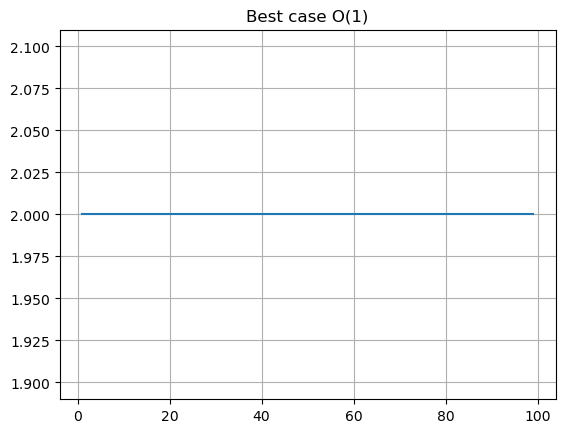

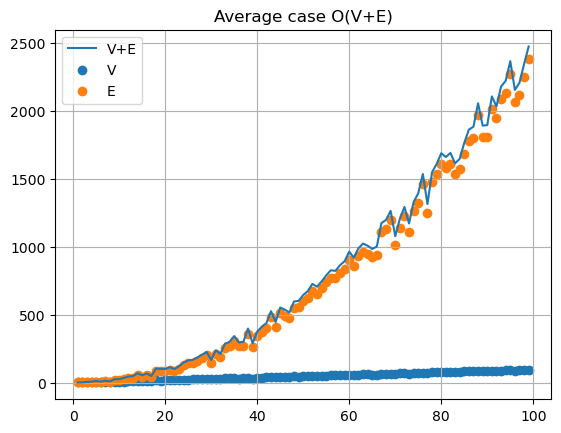

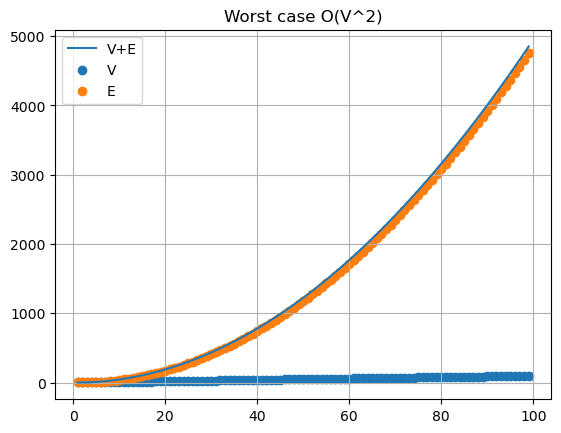

In [82]:
import random
import matplotlib.pyplot as plt

vertices = 0
edges = 0
space = 0

class Node:
    to = 0
    cost = 0
    next = None
    prev = None
    color = 0
    distance = -1
    def __init__(self, to, next, c):
        self.to = to
        self.next = next
        self.cost = c

class Graph:
    edges = []
    grade = []
    numNodes = 0
    numEdges = 0
    isDirected = False
    isTagged = False
    
    
    def __init__ (self, nodes, edges, isDirected, isTagged):
        self.numNodes = nodes
        self.numEdges = edges
        self.edges = []
        self.grade = []
        self.isTagged = isTagged
        self.isDirected = isDirected
        for i in range(0,nodes+1):
            self.grade.append(0)
            self.edges.append(None)

    def __str__ (self):
        item = None
        res = ""
        for i in range(1,self.numNodes+1):
            res += "\nNode #" + str(i) + " :\t"
            item = self.edges[i]
            j = 0
            while item != None:
                res += str(item.to) + ":" + str(item.cost) + "\t"
                item = item.next
        res += "\n"
        return res

    
    def addEdge(self, intU, intV, cost, isDirected):
        newNode = Node(intV, self.edges[intU], cost)
        self.edges[intU] = newNode
        self.grade[intU] += 1

        if isDirected == False and intV != intU:
            self.addEdge(intV, intU, cost, True)

    
    def readEdges(self):
        for i in range(1,self.numEdges+1):
            u = int(input('U: '))
            v = int(input('V: '))
            if self.isTagged == True:
                cost = int(input('Weight: '))
            else:
                cost = 1
            self.addEdge(u, v, cost, False)
    
    def readEdgesList(self,listU,listV):
        for i in range(0,len(listU)):
            u = listU[i]
            if listV == None:
                v = listU[i]
            else: 
                v = listV[i]
            cost = 1
            self.addEdge(u, v, cost, True)
    
    #                                       BFS ANALYSIS
    #                                AVERAGE || WORST || SPACE
    
    def BFS(self, startNode):
        global vertices
        global edges
        global space
        self.edges[startNode].color = 1      #   6  ||  6    ||  1
        self.edges[startNode].distance = 0   #   6  ||  6    ||  1
        self.edges[startNode].prev = None    #   6  ||  6    ||  1
        space = self.numNodes 
        queue = []                           #   3  ||  3    ||  V (Queue of length V)
        queue.append(startNode)              #   3  ||  3    ||  1
        while len(queue) != 0:               #   5(V+1)||  5(V+1)     ||  1
            vertices += 1
            u = queue.pop(0)                 #   5(V)  ||   5(V)      ||  1
            v = self.edges[u]                #   5(V)  ||   5(V)      ||  1
            while v != None:                 #    5(V+(E+1)) ||  5(V+((V*(V-1)/2)+1))  ||   1
                edges += 1
                if self.edges[v.to] != None:                                    #  7(V+E)   ||  7((V^2+V)/2)    ||  1
                    if self.edges[v.to].color == 0:                             #  7(V+E)   ||  7((V^2+V)/2)    ||  1
                        self.edges[v.to].color = 1                              #  6(V+E)   ||  6((V^2+V)/2)    ||  1
                        self.edges[v.to].distance = self.edges[u].distance + 1  #  10(V+E)  ||  10((V^2+V)/2)   ||  1
                        self.edges[v.to].prev = u                               #  6(V+E)   ||  6((V^2+V)/2)    ||  1
                        queue.append(v.to)                                      #  4(V+E)   ||  4((V^2+V)/2)    ||  1
                v = v.next                                                      #  4(V+E)   ||  4((V^2+V)/2)    ||  1 
            self.edges[u].color = 2                                             #  5(V)     ||   5(V)   ||  1
    
    # BFS Best case polynomial: 29 = O(1) (This is for an isolated node or an unconnected graph)
    # BFS Average case polynomial: 74V + 54E + 29 = O(V+E)
    # BFS Worst case polynomial: 54((V^2+V)/2) + 20V + 29 = O(V^2)
    # BFS SPACE polynomial: V + 16 = O(V)
    
    def printColor(self):
        print("BFS: ")
        res = ""
        for i in range(1,self.numNodes+1):
            if self.edges[i] != None:
                if self.edges[i].color == 0:
                    color = "White"
                elif self.edges[i].color == 1:
                    color = "Gray"
                else:
                    color = "Black"
                cont = 0
                tabs = ""
                while cont < self.edges[i].distance:
                    tabs +="\t"
                    cont += 1
                res += tabs + str(i) + ": " +  color + "-" + str(self.edges[i].distance) +"\t"
                res+="\n"
        print(res)

def generateRandomEdges(numNodes):
    ve = []
    ed = []
    for u in range(1, numNodes + 1):
        for v in range(u + 1, numNodes + 1):
            if random.choice([True, False]):
                ve.append(u)
                ed.append(v)
    return ve,ed      

if __name__ == "__main__":
    # Best case
        
    v = 100
    e = 0
    
    x = []
    y = []
    
    for i in range (1,v):
        x.append(i)
        g = Graph(i,0,False,False)
        l = []
        g.readEdgesList(x,None)
        g.BFS(1)
        y.append(edges+vertices)
        vertices = 0
        edges = 0
        space = 0
    
    plt.plot(x,y)
    plt.title('Best case O(1)')
    plt.grid(True)
    plt.show()
    
    v = 100
    
    x = [1,2]
    y = [1,2]
    
    nd = [1,2]
    edg= [1,2]
    
    for i in range (3,v):
        s,f = generateRandomEdges(i)
        g = Graph(i,i,False,True)
        g.readEdgesList(s,f)
        g.BFS(s[0])
        x.append(i)
        nd.append(vertices)
        edg.append(edges)
        y.append(edges+vertices)
        vertices = 0
        edges = 0
        space = 0
    
    plt.plot(x,y,label = 'V+E')
    plt.scatter(x,nd,label = 'V')
    plt.scatter(x,edg,label = 'E')
    plt.title('Average case O(V+E)')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    v = 100
    
    x = [1,2]
    y = [1,2]
    
    nd = [1,2]
    edg= [1,2]
    
    for i in range (3,v):
        com = (i*(i-1))//2
        g = Graph(i,com,False,True)
        s=[]
        f = []
        for j in range (1,com+1):
            for k in range (i-j,1,-1):
                s.append(j)
                f.append(k)
        g.readEdgesList(s,f)
        g.BFS(s[0])
        x.append(i)
        nd.append(vertices)
        edg.append(edges)
        y.append(edges+vertices)
        vertices = 0
        edges = 0
        space = 0
    
    plt.plot(x,y,label = 'V+E')
    plt.scatter(x,nd,label = 'V')
    plt.scatter(x,edg,label = 'E')
    plt.title('Worst case O(V^2)')
    plt.legend()
    plt.grid(True)
    plt.show()



    

    